In [1]:
import geopandas as gpd
import folium



In [3]:
gent_cycle_network = gpd.read_file("gent.gpkg")

C:\Users\sedat\AppData\Local\Temp\ipykernel_15008\2524159970.py:8: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  rr_crossings=rr_crossings.explode()
C:\Users\sedat\AppData\Local\Temp\ipykernel_15008\2524159970.py:37: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  cbar = plt.colorbar(sm)


[(3.5310878168754662, 50.97622207653732), (3.52835002051105, 50.974982539457756), (3.529736714746422, 50.975696280538685), (3.5286343849144237, 50.97513866926665), (3.5014363919463545, 50.95409904995289), (3.4715636119199997, 50.929793313343076), (3.4715636119199997, 50.929793313343076), (3.454748362758774, 50.916171368512956), (3.4548493433110914, 50.916253199052775), (3.4501453786110705, 50.912441294573355), (3.4501453786110705, 50.912441294573355), (3.4334226454113734, 50.898884167258565), (3.6452793213681387, 50.99566031139404), (3.6452793213681387, 50.99566031139404), (3.6497148711291367, 50.99687187345001), (3.6477520698522268, 50.996335737981205), (3.6302772584434817, 50.99288899297987), (3.6302772584434817, 50.99288899297987), (3.6306706847940524, 50.99295645438216), (3.632138401412361, 50.99320694346852), (3.637564583088067, 50.99413300731043), (3.579415322778468, 50.98453872295179), (3.5846814202433075, 50.9853965261775), (3.5751240025573385, 50.983839702785), (3.599311230156

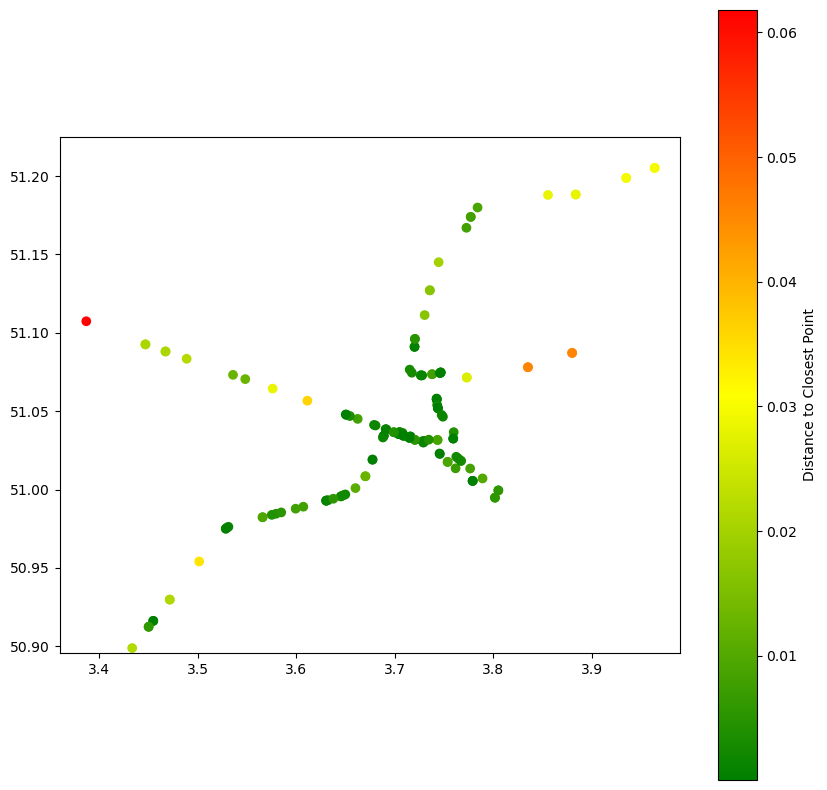

In [4]:
import geopandas as gpd
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

rr_crossings=gpd.read_file("railway_crossings_gent.dpkg")

rr_crossings=rr_crossings.explode()
coords = [point.coords[0] for point in rr_crossings.geometry]

print (coords)

points = [Point(x, y) for x, y in coords]

# Define a function to calculate the distance from a line to the closest point in a list of points
def line_min_distance(line, points):
    distances = [line.distance(point) for point in points]
    distances = [distance for distance in distances if distance != 0] # Exclude distance to self
    return min(distances)

# Calculate the distance from each line to the closest point
distances = rr_crossings.geometry.apply(lambda line: line_min_distance(line, points))

# Map the distances to a color scale
cmap = LinearSegmentedColormap.from_list('distance', ['green', 'yellow', 'red'])
norm = plt.Normalize(vmin=distances.min(), vmax=distances.max())
colors = [cmap(norm(distance)) for distance in distances]

# Plot the GeoDataFrame using the colors
fig, ax = plt.subplots(figsize=(10,10))
bounds = gent_cycle_network.total_bounds
ax = rr_crossings.plot(color=colors, ax=ax)

# Add a colorbar
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm)
cbar.set_label('Distance to Closest Point')

ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

# Show the plot
plt.show()